In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [7]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
X = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y = data['Outcome']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [10]:
test_scores = []
train_scores = []
for i in range(1,20):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)   
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

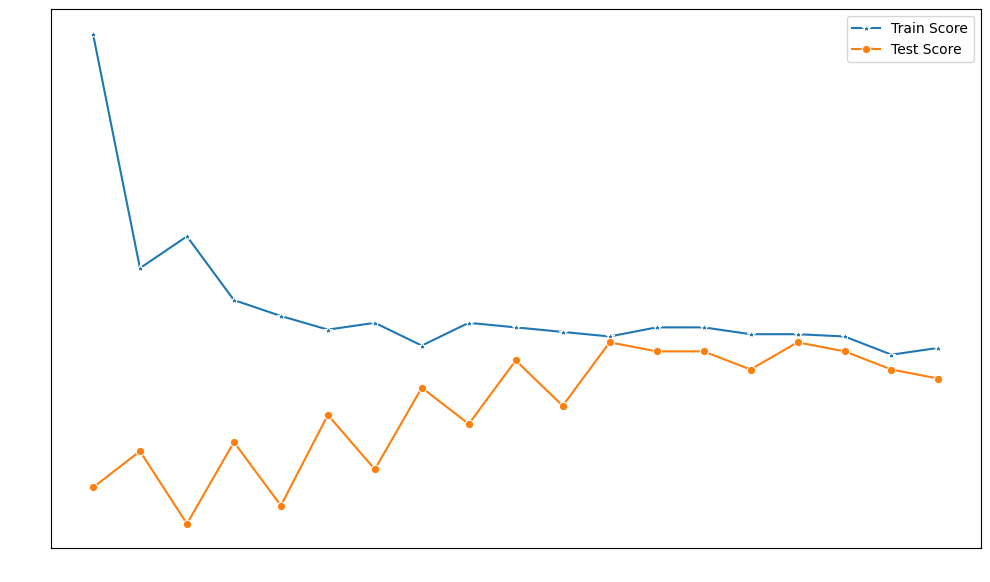

In [14]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(12,7))
plt.tick_params(colors='white')
p = sns.lineplot(x=range(1,20),y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,20),y=test_scores,marker='o',label='Test Score')

In [15]:
knn = KNeighborsClassifier(11)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.7337662337662337

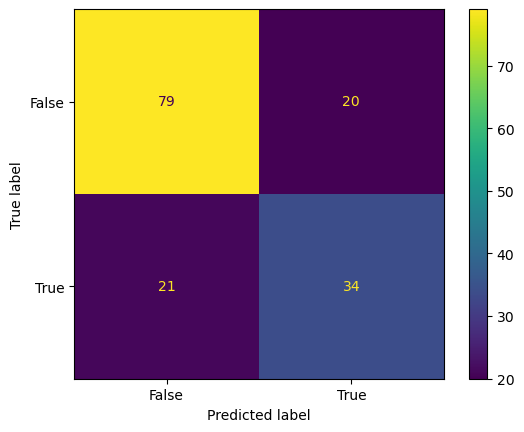

In [16]:
confusion_matrix = metrics.confusion_matrix(y_test,knn.predict(x_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

1


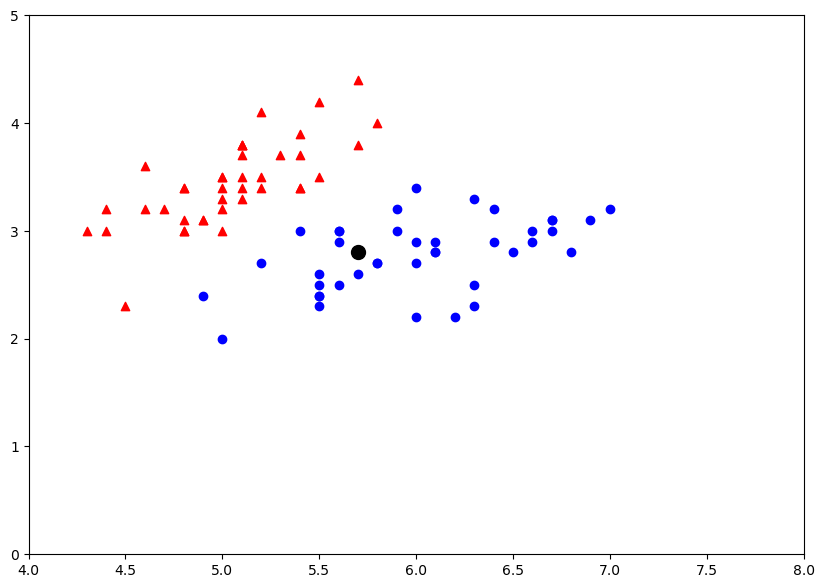

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data=pd.read_csv("KNN_Data.csv",names=["X","Y","Lable"])[10:91]

def KNN_Classifer(Pred_data, data, k):
    data_set=data.iloc[:,0:-1].values
    labels=data.iloc[:,-1].values.reshape(len(data.iloc[:,-1]),-1)
    diff = np.tile(Pred_data, (data_set.shape[0], 1))-data_set
    distance = (np.sum(diff**2, axis=1))**0.5 
    sorted_indices = np.argsort(distance)

    map_label = {} 
    for i in range(k):
        label = labels[sorted_indices[i]][0]
        map_label[label] = map_label.get(label, 0) + 1   

    max_num = 0
    for key, value in map_label.items():
        if value > max_num:
            max_num = value
            ans = key
    return ans

Pred_data=[5.7,2.8]
print(KNN_Classifer(Pred_data,data,int(len(data))))
Ans=KNN_Classifer(Pred_data,data, int(len(data)))
plt.figure(figsize=(10,7))
plt.scatter(list((data[data['Lable']==0]["X"]).values),list((data[data['Lable']==0]["Y"]).values),color='red',marker='^',label='y=0')
plt.scatter(list((data[data['Lable']==1]["X"]).values),list((data[data['Lable']==1]["Y"]).values),color='blue',marker='o',label='y=1')
plt.xlim(4, 8)
plt.ylim(0, 5)
if Ans==0:
    plt.scatter(Pred_data[0],Pred_data[1],color='black',marker='^',s=100)
if Ans==1:
    plt.scatter(Pred_data[0],Pred_data[1],color='black',marker='o',s=100)
plt.show()